# Natural Language Processing (NLP) Project : Sentiment Analysis on Tweets about Apple and Google Products


## Overview
This project aims to analyze Twitter sentiment about Apple and Google products using Natural Language Processing (NLP). The dataset contains tweets labeled as positive, negative, or neutral. By building a sentiment analysis model, we aim to categorize the sentiment of tweets accurately and gain insights into public perception of these tech giants' products.

## Business Understanding
### Business Problem
Understanding customer sentiment is critical for businesses to gauge public opinion and improve products or services. For Apple and Google, analyzing Twitter sentiment can provide actionable insights to enhance user satisfaction and market strategies.

### Stakeholders
1. `Marketing Teams`:
Use insights to create targeted campaigns focusing on products with positive sentiment.
Address negative feedback to improve brand perception.
2. `Product Teams`:
Identify areas of improvement for specific products (e.g., iPhone or Pixel).
3. `Executives`:
Make data-driven decisions for product launches, pricing strategies, and market positioning.

### Objectives
1. Build a model to classify the sentiment of tweets into positive, negative, or neutral categories.
2. Evaluate model performance using suitable metrics.
3. Provide insights and recommendations based on the analysis results.

## Data Understanding
Here, we intend to comprehensively explore and analyze our dataset to gain insights into its structure, content, and quality.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('sentiment.csv', encoding='unicode_escape')

In [3]:
# View the first five rows of the dataset to see if loading has been done correctly
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# View the overall information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
# Summary statistics of columns
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [6]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

### Data Overview
The dataset provides comprehensive information about over 9,000 tweets labeled as positive, negative, or neutral.
- **Rows**: 9,093.
- **Columns**: 3.
- **Column Names**: 
     - `tweet_text` - Content of the tweet..
     - `emotion_in_tweet_is_directed_at` - Subject of the tweet_text.
     - `is_there_an_emotion_directed_at_a_brand_or_product` - Sentiment label.
- **Data Types**:
     - `Categorical Columns`: All 3 columns.
- **Missing Values**:
     - `tweet_text`: 1 missing value.
     - `emotion_in_tweet_is_directed_at`: 5,802 missing values.
     - `is_there_an_emotion_directed_at_a_brand_or_product`: No missing values.
- **Nunique**:
     - `tweet_text`: 9,065 unique tweets.
     - `emotion_in_tweet_is_directed_at`: 9 unique products.
     - `is_there_an_emotion_directed_at_a_brand_or_product`: 4 unique sentiment labels ('Negative emotion', 'Positive emotion', 'No emotion toward brand or product', 'I can't tell')

## Data Cleaning
We intent to identify, correct, and remove errors, inconsistencies, and inaccuracies in our dataset to ensure that the data is accurate, complete, and reliable for analysis.

### 1. Checking and dealing with missing values

In [7]:
#check for missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [8]:
#checking the percentage of missing values
df.isnull().mean()

tweet_text                                            0.000110
emotion_in_tweet_is_directed_at                       0.638073
is_there_an_emotion_directed_at_a_brand_or_product    0.000000
dtype: float64

In [9]:

#Define the keyword-to-target mapping
keywords_to_targets = {
    "iPhone": "Apple",
    "iPad": "Apple",
    "Mac": "Apple",
    "Apple": "Apple",
    "Google": "Google",
    "Android": "Google",
    "Pixel": "Google",
    "Chrome": "Google",
    "Nexus": "Google",
    "Other Google product or service" : "Google",
    "Other Apple product or service" : "Apple",
    "Android App" : "Google",
    "iPad or iPhone App" : "Apple",
    " Apple": "Apple"
}

#Function to impute missing targets based on keywords
df["emotion_in_tweet_is_directed_at"] = df["emotion_in_tweet_is_directed_at"].replace(keywords_to_targets)
def impute_target_directly(text, existing_target):
    if pd.isna(existing_target):  # Only impute if the target is missing
        for keyword, target in keywords_to_targets.items():
            if keyword.lower() in str(text).lower():
                return target
    return existing_target  # If not missing, keep the original value

#Apply the imputation directly to the target column

df["emotion_in_tweet_is_directed_at"] = df.apply(
    lambda row: impute_target_directly(row["tweet_text"], row["emotion_in_tweet_is_directed_at"]), axis=1
)


#Remove rows where the target is still missing (optional)
df = df.dropna(subset=["emotion_in_tweet_is_directed_at"]).reset_index(drop=True)

#Check for remaining missing values
print("Missing Values After Cleaning:\n", df.isnull().sum())
print()

#Check the distribution of target column
print("Target Distribution:\n", df["emotion_in_tweet_is_directed_at"].value_counts())


Missing Values After Cleaning:
 tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

Target Distribution:
 Apple     5540
Google    2796
Name: emotion_in_tweet_is_directed_at, dtype: int64


### 2. Renaming the columns

In [10]:
#renaming the column names 
df = df.rename(columns = {'is_there_an_emotion_directed_at_a_brand_or_product': 'tweet_sentiment'})
df = df.rename(columns = {'emotion_in_tweet_is_directed_at': 'brand'})
df

,tweet_text,brand,tweet_sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8331,Ipad everywhere. #SXSW {link},Apple,Positive emotion
8332,"Wave, buzz... RT @mention We interrupt your re...",Google,No emotion toward brand or product
8333,"Google's Zeiger, a physician never reported po...",Google,No emotion toward brand or product
8334,Some Verizon iPhone customers complained their...,Apple,No emotion toward brand or product


### 3. Inspecting columns contents
Here we are checking the contents of the columns in the DataFrame to gain insights into the data structure and identify any potential issues with the data,such as inconsistent formats.

In [11]:
df['brand'].value_counts()

Apple     5540
Google    2796
Name: brand, dtype: int64

In [12]:
#checking for sentiment count 
df['tweet_sentiment'].value_counts()

No emotion toward brand or product    4652
Positive emotion                      2965
Negative emotion                       569
I can't tell                           150
Name: tweet_sentiment, dtype: int64

In [13]:
#renaming unknown sentiment to neutral
df['tweet_sentiment'] = df['tweet_sentiment'].replace({'No emotion toward brand or product': 'Neutral emotion'})
df['tweet_sentiment'].value_counts()

Neutral emotion     4652
Positive emotion    2965
Negative emotion     569
I can't tell         150
Name: tweet_sentiment, dtype: int64

In [14]:
#dropped the the I can't tell because it does not meet business understanding
df = df[df['tweet_sentiment'] !=  "I can't tell"]

## Explanatory Data Analysis

### 1. Distribution of sentiments

In [15]:
counts = df['tweet_sentiment'].value_counts()
counts 

Neutral emotion     4652
Positive emotion    2965
Negative emotion     569
Name: tweet_sentiment, dtype: int64

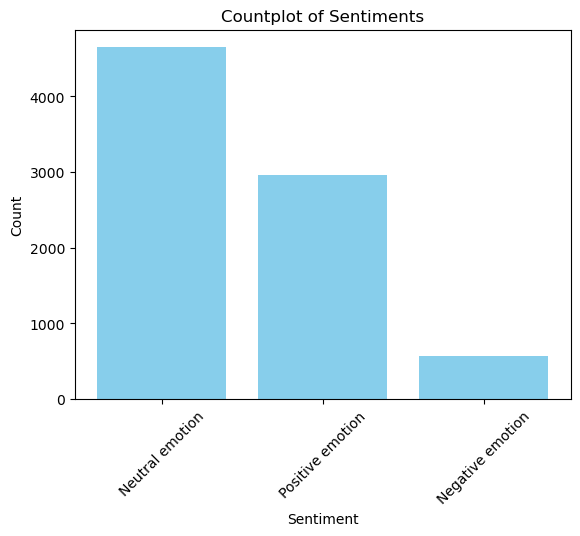

In [16]:
#visualizing the target variable
plt.bar(counts.index, counts.values, color='skyblue')
plt.title('Countplot of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 2. Distribution of Brands

In [17]:
counts_1 = df['brand'].value_counts()

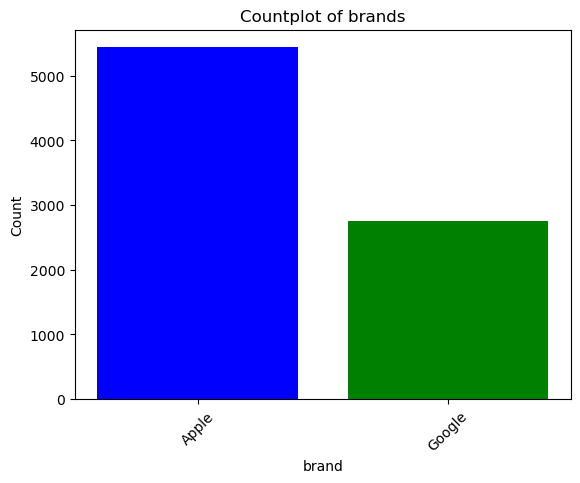

In [18]:
#visualizing the brand column
plt.bar(counts_1.index, counts_1.values, color= ['blue', 'green'])
plt.title('Countplot of brands')
plt.xlabel('brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 3. Distribution of brands according to sentiments

In [19]:
sentiment_counts = df.groupby(['brand', 'tweet_sentiment']).size().unstack(fill_value=0)
sentiment_counts 

tweet_sentiment,Negative emotion,Neutral emotion,Positive emotion
brand,,,
Apple,419,2886,2135
Google,150,1766,830


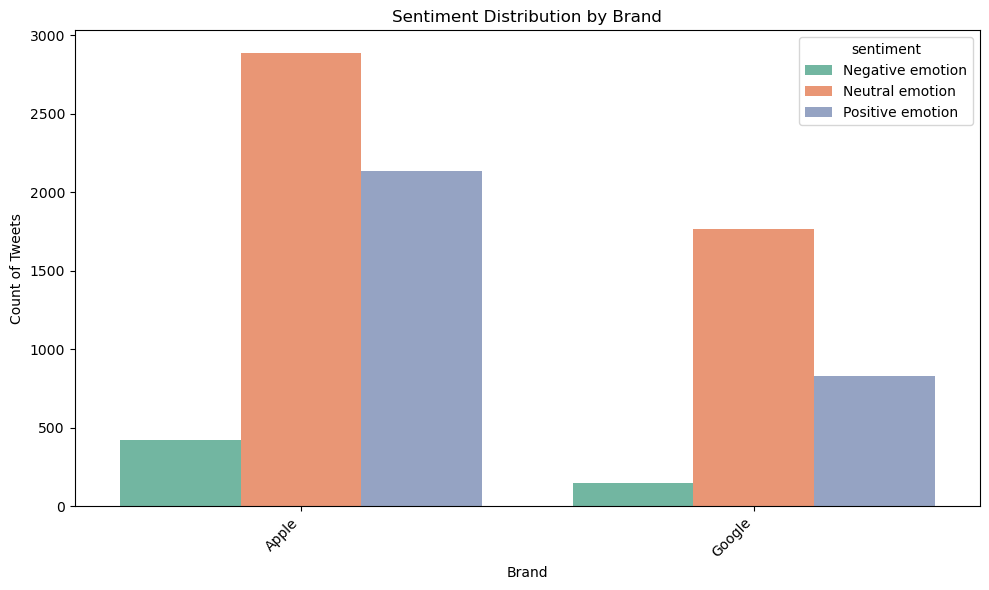

In [20]:

sentiment_counts = sentiment_counts.reset_index()
sentiment_counts_melted = sentiment_counts.melt(id_vars='brand', var_name='sentiment', value_name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='count', hue='sentiment', data=sentiment_counts_melted, palette='Set2')
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Count of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()